In [1]:
import pandas as pd

In [2]:
PHospitals3_days = pd.read_pickle("../mydata/Poltava_3_Hospitals.pkl")

In [3]:

PHospitals3_days = PHospitals3_days[PHospitals3_days['Date'] >= '2018-1-1']
PHospitals3_days = PHospitals3_days[PHospitals3_days['Date'] < '2021-1-1']


In [49]:
PHospitals3_days.columns.values

array(['Record_ID', 'Hospitalization_Visit_Date_x', 'Discharge_Date_x',
       'Date', 'Hospital', 'Hospital_ID', 'System_Input_Date', 'ID',
       'Patient_Gender', 'Birth_Date', 'Patient_Age_Days',
       'Hospitalization_Visit_Date_y', 'Discharge_Date_y',
       'Main_Diagnosis_Code', 'Concomitant_Diagnosis_1',
       'Concomitant_Diagnosis_2', 'Concomitant_Diagnosis_3',
       'Concomitant_Diagnosis_4', 'Concomitant_Diagnosis_5',
       'Procedure_ID_1', 'Procedure_ID_2', 'Procedure_ID_3',
       'Procedure_ID_4', 'Procedure_ID_5', 'Results_of_Care',
       'HospitalAbb', 'Hospital_MyID', 'Days_In_Hospital',
       'Main_Diagnosis_L1', 'Main_Diagnosis_L1_name', 'Main_Diagnosis_L2',
       'Main_Diagnosis_L2_name', 'Main_Diagnosis_L3',
       'Main_Diagnosis_L3_name', 'Main_Diagnosis_name', 'index',
       'Reporting_Month', 'Data_Source', 'Type_of_Referral',
       'Finance_Program', 'Referral_ID',
       'Position_of_Doctor_Who_Gave_Referral', 'ID_of_Paper_Referral',
       'Stati

In [220]:
PoltavaH_All_Q = PHospitals3_days.groupby([pd.Grouper(key = 'Date', freq='Q'), 'Hospital_ID','Main_Diagnosis_L1'])['Record_ID'].nunique()
PoltavaH_All_Q

Date        Hospital_ID  Main_Diagnosis_L1
2018-03-31  1111581      A00-B99               4
                         C00-D48              34
                         D50-D89               3
                         E00-E99               6
                         F00-F99               4
                                              ..
2020-12-31  1999388      R00-R99              13
                         S00-T99              43
                         U00-U85              16
                         V00-Z99               2
                         Z00-Z99               6
Name: Record_ID, Length: 628, dtype: int64

In [221]:
PoltavaH_All_Q = PoltavaH_All_Q.reset_index()
PoltavaH_All_Q

,Date,Hospital_ID,Main_Diagnosis_L1,Record_ID
0,2018-03-31,1111581,A00-B99,4
1,2018-03-31,1111581,C00-D48,34
2,2018-03-31,1111581,D50-D89,3
3,2018-03-31,1111581,E00-E99,6
4,2018-03-31,1111581,F00-F99,4
...,...,...,...,...
623,2020-12-31,1999388,R00-R99,13
624,2020-12-31,1999388,S00-T99,43
625,2020-12-31,1999388,U00-U85,16
626,2020-12-31,1999388,V00-Z99,2


In [222]:
PoltavaH_All_Q_I0099 = PoltavaH_All_Q[PoltavaH_All_Q['Main_Diagnosis_L1'] == 'I00-I99']

In [223]:
PoltavaH_All_Q_I0099

,Date,Hospital_ID,Main_Diagnosis_L1,Record_ID
6,2018-03-31,1111581,I00-I99,637
26,2018-03-31,1999106,I00-I99,1191
45,2018-03-31,1999388,I00-I99,626
63,2018-06-30,1111581,I00-I99,454
82,2018-06-30,1999106,I00-I99,1125
101,2018-06-30,1999388,I00-I99,617
119,2018-09-30,1111581,I00-I99,419
139,2018-09-30,1999106,I00-I99,916
160,2018-09-30,1999388,I00-I99,527
176,2018-12-31,1111581,I00-I99,489


In [225]:
PoltavaH_All_Q_I0099_pivot = PoltavaH_All_Q_I0099.pivot_table(index="Date", columns="Hospital_ID", values="Record_ID")
PoltavaH_All_Q_I0099_pivot

Hospital_ID,1111581,1999106,1999388
Date,,,
2018-03-31,637.0,1191.0,626.0
2018-06-30,454.0,1125.0,617.0
2018-09-30,419.0,916.0,527.0
2018-12-31,489.0,1196.0,623.0
2019-03-31,550.0,1142.0,573.0
2019-06-30,468.0,976.0,609.0
2019-09-30,446.0,965.0,558.0
2019-12-31,559.0,1094.0,642.0
2020-03-31,298.0,1035.0,191.0


In [153]:
PoltavaH_All_Q_L1 = PoltavaH_All_Q.groupby(['Date', 'Main_Diagnosis_L1'])['Record_ID'].sum()
PoltavaH_All_Q_L1

Date        Main_Diagnosis_L1
2018-03-31  A00-B99               74
            C00-D48              746
            D50-D89               55
            E00-E99              434
            F00-F99               26
                                ... 
2020-12-31  R00-R99               15
            S00-T99              359
            U00-U85               53
            V00-Z99                2
            Z00-Z99               14
Name: Record_ID, Length: 249, dtype: int64

In [154]:
PoltavaH_All_Q_L1 = PoltavaH_All_Q_L1.reset_index()

In [155]:
PoltavaH_All_Q_L1

,Date,Main_Diagnosis_L1,Record_ID
0,2018-03-31,A00-B99,74
1,2018-03-31,C00-D48,746
2,2018-03-31,D50-D89,55
3,2018-03-31,E00-E99,434
4,2018-03-31,F00-F99,26
...,...,...,...
244,2020-12-31,R00-R99,15
245,2020-12-31,S00-T99,359
246,2020-12-31,U00-U85,53
247,2020-12-31,V00-Z99,2


In [156]:
PoltavaH_All_Q_L1_pivot = PoltavaH_All_Q_L1.pivot_table(index="Date", columns="Main_Diagnosis_L1", values="Record_ID")
PoltavaH_All_Q_L1_pivot

Main_Diagnosis_L1,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H00-H59,H60-H99,I00-I99,J00-J99,...,N00-N99,O00-O99,P00-P99,Q00-Q99,R00-R99,S00-T99,U00-U85,U78-U88,V00-Z99,Z00-Z99
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,74.0,746.0,55.0,434.0,26.0,515.0,1028.0,70.0,2454.0,2146.0,...,1079.0,1052.0,4.0,77.0,36.0,891.0,NaN,NaN,2.0,10.0
2018-06-30,124.0,724.0,67.0,433.0,27.0,563.0,979.0,80.0,2196.0,1388.0,...,1075.0,979.0,3.0,66.0,43.0,929.0,NaN,NaN,1.0,18.0
2018-09-30,127.0,745.0,57.0,389.0,16.0,567.0,890.0,93.0,1862.0,1471.0,...,1056.0,1015.0,3.0,54.0,43.0,946.0,NaN,NaN,4.0,29.0
2018-12-31,75.0,743.0,48.0,468.0,20.0,644.0,1295.0,83.0,2308.0,1801.0,...,1078.0,904.0,88.0,79.0,39.0,887.0,NaN,NaN,4.0,43.0
2019-03-31,138.0,749.0,31.0,401.0,22.0,628.0,971.0,74.0,2265.0,1684.0,...,1097.0,938.0,223.0,62.0,35.0,801.0,NaN,NaN,5.0,19.0
2019-06-30,173.0,718.0,34.0,386.0,8.0,710.0,992.0,80.0,2053.0,1404.0,...,1133.0,1019.0,282.0,76.0,24.0,852.0,NaN,NaN,5.0,14.0
2019-09-30,162.0,695.0,43.0,410.0,12.0,899.0,854.0,99.0,1969.0,1338.0,...,1213.0,1072.0,326.0,71.0,35.0,912.0,NaN,NaN,NaN,14.0
2019-12-31,152.0,760.0,41.0,465.0,10.0,934.0,1308.0,82.0,2295.0,1538.0,...,1315.0,959.0,302.0,61.0,39.0,836.0,NaN,NaN,NaN,8.0
2020-03-31,48.0,523.0,26.0,294.0,10.0,597.0,737.0,55.0,1524.0,1176.0,...,917.0,755.0,254.0,54.0,20.0,515.0,NaN,NaN,NaN,6.0


In [159]:
PoltavaH_All_Q_L1_pivot

Main_Diagnosis_L1,Date,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H00-H59,H60-H99,I00-I99,...,N00-N99,O00-O99,P00-P99,Q00-Q99,R00-R99,S00-T99,U00-U85,U78-U88,V00-Z99,Z00-Z99
0,2018-03-31,74.0,746.0,55.0,434.0,26.0,515.0,1028.0,70.0,2454.0,...,1079.0,1052.0,4.0,77.0,36.0,891.0,NaN,NaN,2.0,10.0
1,2018-06-30,124.0,724.0,67.0,433.0,27.0,563.0,979.0,80.0,2196.0,...,1075.0,979.0,3.0,66.0,43.0,929.0,NaN,NaN,1.0,18.0
2,2018-09-30,127.0,745.0,57.0,389.0,16.0,567.0,890.0,93.0,1862.0,...,1056.0,1015.0,3.0,54.0,43.0,946.0,NaN,NaN,4.0,29.0
3,2018-12-31,75.0,743.0,48.0,468.0,20.0,644.0,1295.0,83.0,2308.0,...,1078.0,904.0,88.0,79.0,39.0,887.0,NaN,NaN,4.0,43.0
4,2019-03-31,138.0,749.0,31.0,401.0,22.0,628.0,971.0,74.0,2265.0,...,1097.0,938.0,223.0,62.0,35.0,801.0,NaN,NaN,5.0,19.0
5,2019-06-30,173.0,718.0,34.0,386.0,8.0,710.0,992.0,80.0,2053.0,...,1133.0,1019.0,282.0,76.0,24.0,852.0,NaN,NaN,5.0,14.0
6,2019-09-30,162.0,695.0,43.0,410.0,12.0,899.0,854.0,99.0,1969.0,...,1213.0,1072.0,326.0,71.0,35.0,912.0,NaN,NaN,NaN,14.0
7,2019-12-31,152.0,760.0,41.0,465.0,10.0,934.0,1308.0,82.0,2295.0,...,1315.0,959.0,302.0,61.0,39.0,836.0,NaN,NaN,NaN,8.0
8,2020-03-31,48.0,523.0,26.0,294.0,10.0,597.0,737.0,55.0,1524.0,...,917.0,755.0,254.0,54.0,20.0,515.0,NaN,NaN,NaN,6.0
9,2020-06-30,12.0,37.0,5.0,9.0,NaN,25.0,37.0,6.0,330.0,...,61.0,617.0,316.0,11.0,1.0,58.0,NaN,1.0,3.0,29.0


In [161]:
PoltavaH_All_Q_L1_pivot.reset_index(inplace = True)
PoltavaH_All_Q_L1_pivot.drop(columns=['index'], inplace = True)
PoltavaH_All_Q_L1_pivot.fillna(0, inplace = True)
PoltavaH_All_Q_L1_pivot

Main_Diagnosis_L1,Date,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H00-H59,H60-H99,I00-I99,...,N00-N99,O00-O99,P00-P99,Q00-Q99,R00-R99,S00-T99,U00-U85,U78-U88,V00-Z99,Z00-Z99
0,2018-03-31,74.0,746.0,55.0,434.0,26.0,515.0,1028.0,70.0,2454.0,...,1079.0,1052.0,4.0,77.0,36.0,891.0,0.0,0.0,2.0,10.0
1,2018-06-30,124.0,724.0,67.0,433.0,27.0,563.0,979.0,80.0,2196.0,...,1075.0,979.0,3.0,66.0,43.0,929.0,0.0,0.0,1.0,18.0
2,2018-09-30,127.0,745.0,57.0,389.0,16.0,567.0,890.0,93.0,1862.0,...,1056.0,1015.0,3.0,54.0,43.0,946.0,0.0,0.0,4.0,29.0
3,2018-12-31,75.0,743.0,48.0,468.0,20.0,644.0,1295.0,83.0,2308.0,...,1078.0,904.0,88.0,79.0,39.0,887.0,0.0,0.0,4.0,43.0
4,2019-03-31,138.0,749.0,31.0,401.0,22.0,628.0,971.0,74.0,2265.0,...,1097.0,938.0,223.0,62.0,35.0,801.0,0.0,0.0,5.0,19.0
5,2019-06-30,173.0,718.0,34.0,386.0,8.0,710.0,992.0,80.0,2053.0,...,1133.0,1019.0,282.0,76.0,24.0,852.0,0.0,0.0,5.0,14.0
6,2019-09-30,162.0,695.0,43.0,410.0,12.0,899.0,854.0,99.0,1969.0,...,1213.0,1072.0,326.0,71.0,35.0,912.0,0.0,0.0,0.0,14.0
7,2019-12-31,152.0,760.0,41.0,465.0,10.0,934.0,1308.0,82.0,2295.0,...,1315.0,959.0,302.0,61.0,39.0,836.0,0.0,0.0,0.0,8.0
8,2020-03-31,48.0,523.0,26.0,294.0,10.0,597.0,737.0,55.0,1524.0,...,917.0,755.0,254.0,54.0,20.0,515.0,0.0,0.0,0.0,6.0
9,2020-06-30,12.0,37.0,5.0,9.0,0.0,25.0,37.0,6.0,330.0,...,61.0,617.0,316.0,11.0,1.0,58.0,0.0,1.0,3.0,29.0


In [164]:
PoltavaH_All_Q_L1_pivot

Main_Diagnosis_L1,index,Date,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H00-H59,H60-H99,...,N00-N99,O00-O99,P00-P99,Q00-Q99,R00-R99,S00-T99,U00-U85,U78-U88,V00-Z99,Z00-Z99
0,0,2018-03-31,74.0,746.0,55.0,434.0,26.0,515.0,1028.0,70.0,...,1079.0,1052.0,4.0,77.0,36.0,891.0,0.0,0.0,2.0,10.0
1,1,2018-06-30,124.0,724.0,67.0,433.0,27.0,563.0,979.0,80.0,...,1075.0,979.0,3.0,66.0,43.0,929.0,0.0,0.0,1.0,18.0
2,2,2018-09-30,127.0,745.0,57.0,389.0,16.0,567.0,890.0,93.0,...,1056.0,1015.0,3.0,54.0,43.0,946.0,0.0,0.0,4.0,29.0
3,3,2018-12-31,75.0,743.0,48.0,468.0,20.0,644.0,1295.0,83.0,...,1078.0,904.0,88.0,79.0,39.0,887.0,0.0,0.0,4.0,43.0
4,4,2019-03-31,138.0,749.0,31.0,401.0,22.0,628.0,971.0,74.0,...,1097.0,938.0,223.0,62.0,35.0,801.0,0.0,0.0,5.0,19.0
5,5,2019-06-30,173.0,718.0,34.0,386.0,8.0,710.0,992.0,80.0,...,1133.0,1019.0,282.0,76.0,24.0,852.0,0.0,0.0,5.0,14.0
6,6,2019-09-30,162.0,695.0,43.0,410.0,12.0,899.0,854.0,99.0,...,1213.0,1072.0,326.0,71.0,35.0,912.0,0.0,0.0,0.0,14.0
7,7,2019-12-31,152.0,760.0,41.0,465.0,10.0,934.0,1308.0,82.0,...,1315.0,959.0,302.0,61.0,39.0,836.0,0.0,0.0,0.0,8.0
8,8,2020-03-31,48.0,523.0,26.0,294.0,10.0,597.0,737.0,55.0,...,917.0,755.0,254.0,54.0,20.0,515.0,0.0,0.0,0.0,6.0
9,9,2020-06-30,12.0,37.0,5.0,9.0,0.0,25.0,37.0,6.0,...,61.0,617.0,316.0,11.0,1.0,58.0,0.0,1.0,3.0,29.0


In [167]:
PoltavaH_All_Q_L1_pivot = PoltavaH_All_Q_L1_pivot.reset_index()
PoltavaH_All_Q_L1_pivot

Main_Diagnosis_L1,level_0,index,Date,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H00-H59,...,N00-N99,O00-O99,P00-P99,Q00-Q99,R00-R99,S00-T99,U00-U85,U78-U88,V00-Z99,Z00-Z99
0,0,0,2018-03-31,74.0,746.0,55.0,434.0,26.0,515.0,1028.0,...,1079.0,1052.0,4.0,77.0,36.0,891.0,0.0,0.0,2.0,10.0
1,1,1,2018-06-30,124.0,724.0,67.0,433.0,27.0,563.0,979.0,...,1075.0,979.0,3.0,66.0,43.0,929.0,0.0,0.0,1.0,18.0
2,2,2,2018-09-30,127.0,745.0,57.0,389.0,16.0,567.0,890.0,...,1056.0,1015.0,3.0,54.0,43.0,946.0,0.0,0.0,4.0,29.0
3,3,3,2018-12-31,75.0,743.0,48.0,468.0,20.0,644.0,1295.0,...,1078.0,904.0,88.0,79.0,39.0,887.0,0.0,0.0,4.0,43.0
4,4,4,2019-03-31,138.0,749.0,31.0,401.0,22.0,628.0,971.0,...,1097.0,938.0,223.0,62.0,35.0,801.0,0.0,0.0,5.0,19.0
5,5,5,2019-06-30,173.0,718.0,34.0,386.0,8.0,710.0,992.0,...,1133.0,1019.0,282.0,76.0,24.0,852.0,0.0,0.0,5.0,14.0
6,6,6,2019-09-30,162.0,695.0,43.0,410.0,12.0,899.0,854.0,...,1213.0,1072.0,326.0,71.0,35.0,912.0,0.0,0.0,0.0,14.0
7,7,7,2019-12-31,152.0,760.0,41.0,465.0,10.0,934.0,1308.0,...,1315.0,959.0,302.0,61.0,39.0,836.0,0.0,0.0,0.0,8.0
8,8,8,2020-03-31,48.0,523.0,26.0,294.0,10.0,597.0,737.0,...,917.0,755.0,254.0,54.0,20.0,515.0,0.0,0.0,0.0,6.0
9,9,9,2020-06-30,12.0,37.0,5.0,9.0,0.0,25.0,37.0,...,61.0,617.0,316.0,11.0,1.0,58.0,0.0,1.0,3.0,29.0


In [169]:
PoltavaH_All_Q_L1_pivot.columns.values

array(['level_0', 'index', 'Date', 'A00-B99', 'C00-D48', 'D50-D89',
       'E00-E99', 'F00-F99', 'G00-G99', 'H00-H59', 'H60-H99', 'I00-I99',
       'J00-J99', 'K00-K99', 'L00-L99', 'M00-M99', 'N00-N99', 'O00-O99',
       'P00-P99', 'Q00-Q99', 'R00-R99', 'S00-T99', 'U00-U85', 'U78-U88',
       'V00-Z99', 'Z00-Z99'], dtype=object)

In [174]:
PoltavaH_All_Q_L1_pivot = PoltavaH_All_Q_L1_pivot.reset_index().rename_axis(None, axis=1)

PoltavaH_All_Q_L1_pivot

,index,Date,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H00-H59,H60-H99,...,N00-N99,O00-O99,P00-P99,Q00-Q99,R00-R99,S00-T99,U00-U85,U78-U88,V00-Z99,Z00-Z99
0,0,2018-03-31,74.0,746.0,55.0,434.0,26.0,515.0,1028.0,70.0,...,1079.0,1052.0,4.0,77.0,36.0,891.0,0.0,0.0,2.0,10.0
1,1,2018-06-30,124.0,724.0,67.0,433.0,27.0,563.0,979.0,80.0,...,1075.0,979.0,3.0,66.0,43.0,929.0,0.0,0.0,1.0,18.0
2,2,2018-09-30,127.0,745.0,57.0,389.0,16.0,567.0,890.0,93.0,...,1056.0,1015.0,3.0,54.0,43.0,946.0,0.0,0.0,4.0,29.0
3,3,2018-12-31,75.0,743.0,48.0,468.0,20.0,644.0,1295.0,83.0,...,1078.0,904.0,88.0,79.0,39.0,887.0,0.0,0.0,4.0,43.0
4,4,2019-03-31,138.0,749.0,31.0,401.0,22.0,628.0,971.0,74.0,...,1097.0,938.0,223.0,62.0,35.0,801.0,0.0,0.0,5.0,19.0
5,5,2019-06-30,173.0,718.0,34.0,386.0,8.0,710.0,992.0,80.0,...,1133.0,1019.0,282.0,76.0,24.0,852.0,0.0,0.0,5.0,14.0
6,6,2019-09-30,162.0,695.0,43.0,410.0,12.0,899.0,854.0,99.0,...,1213.0,1072.0,326.0,71.0,35.0,912.0,0.0,0.0,0.0,14.0
7,7,2019-12-31,152.0,760.0,41.0,465.0,10.0,934.0,1308.0,82.0,...,1315.0,959.0,302.0,61.0,39.0,836.0,0.0,0.0,0.0,8.0
8,8,2020-03-31,48.0,523.0,26.0,294.0,10.0,597.0,737.0,55.0,...,917.0,755.0,254.0,54.0,20.0,515.0,0.0,0.0,0.0,6.0
9,9,2020-06-30,12.0,37.0,5.0,9.0,0.0,25.0,37.0,6.0,...,61.0,617.0,316.0,11.0,1.0,58.0,0.0,1.0,3.0,29.0


In [175]:
PoltavaH_All_Q_L1_pivot.drop(columns=['index'], inplace = True)

In [176]:
PoltavaH_All_Q_L1_pivot = PoltavaH_All_Q_L1_pivot.set_index('Date')

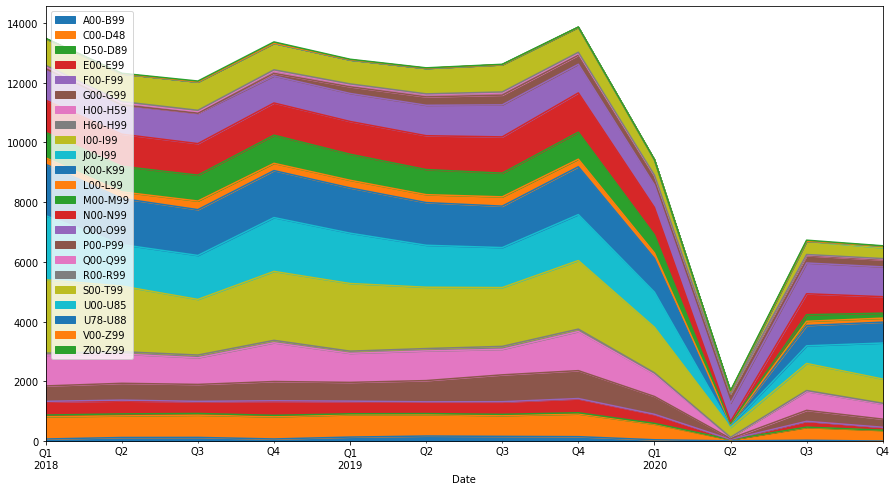

In [183]:
import matplotlib.pyplot as plt
from matplotlib import cm
#cmap = cm.get_cmap('tab20b')
PoltavaH_All_Q_L1_pivot.plot.area(figsize = (15, 8))
plt.legend(loc='upper left')



#HPPoltava_Q1.plot(kind='bar',stacked=True, figsize = (15, 8), cmap=cmap)
#plt.legend(loc='lower left')

In [202]:
PoltavaH_All_Q_L1_pivot_2 =  PoltavaH_All_Q_L1_pivot.drop(RemoveCodesList, axis = 1)


In [206]:
PoltavaH_All_Q_L1_pivot_2

,C00-D48,E00-E99,G00-G99,H00-H59,I00-I99,J00-J99,K00-K99,L00-L99,M00-M99,N00-N99,O00-O99,P00-P99,S00-T99
Date,,,,,,,,,,,,,
2018-03-31,746.0,434.0,515.0,1028.0,2454.0,2146.0,1720.0,216.0,850.0,1079.0,1052.0,4.0,891.0
2018-06-30,724.0,433.0,563.0,979.0,2196.0,1388.0,1545.0,218.0,857.0,1075.0,979.0,3.0,929.0
2018-09-30,745.0,389.0,567.0,890.0,1862.0,1471.0,1534.0,288.0,866.0,1056.0,1015.0,3.0,946.0
2018-12-31,743.0,468.0,644.0,1295.0,2308.0,1801.0,1573.0,243.0,942.0,1078.0,904.0,88.0,887.0
2019-03-31,749.0,401.0,628.0,971.0,2265.0,1684.0,1515.0,256.0,871.0,1097.0,938.0,223.0,801.0
2019-06-30,718.0,386.0,710.0,992.0,2053.0,1404.0,1429.0,265.0,840.0,1133.0,1019.0,282.0,852.0
2019-09-30,695.0,410.0,899.0,854.0,1969.0,1338.0,1387.0,311.0,794.0,1213.0,1072.0,326.0,912.0
2019-12-31,760.0,465.0,934.0,1308.0,2295.0,1538.0,1601.0,253.0,904.0,1315.0,959.0,302.0,836.0
2020-03-31,523.0,294.0,597.0,737.0,1524.0,1176.0,1129.0,182.0,605.0,917.0,755.0,254.0,515.0


In [207]:
PoltavaH_All_Q_L1_pivot_2.columns = ['Tumors', 'Endocrine Diseases', 'Nervous Diseases', 'Eyes Diseases', \
                                     'Circulatory System Diseases', 'Respiratory Diseases', 'Digestion Diseases', \
                                     'Skin Diseases', 'Musles and Bones Diseases', 'Urinary Diseases', \
                                     'Pregnancy/Childbirth Complications', 'Perinatal Disorders', 'Injuries and Poisoning']

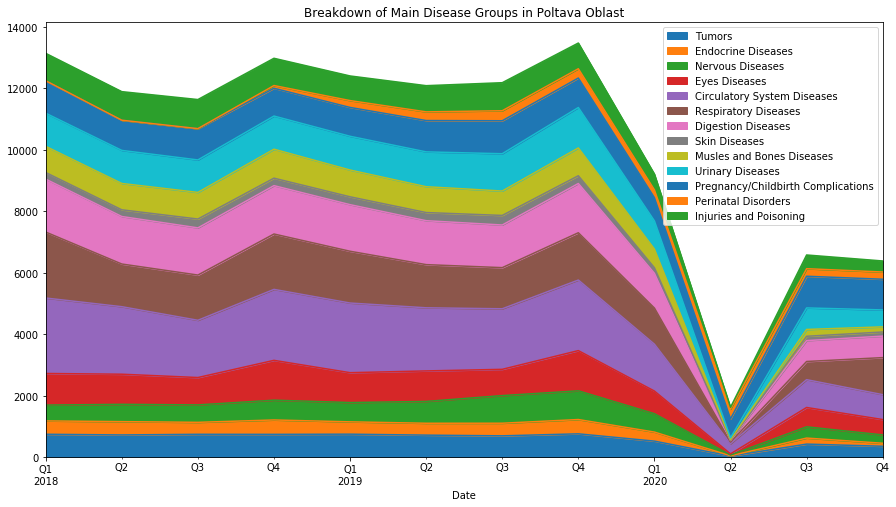

In [215]:
plot = PoltavaH_All_Q_L1_pivot_2.plot.area(figsize = (15, 8), title = 'Breakdown of Main Disease Groups in Poltava Oblast')
plt.legend(loc='upper right')

fig = plot.get_figure()
fig.savefig("./images/Poltava_Diseases_Breakdown.png")

In [184]:
PoltavaH_All_Q_L1_pivot_div

,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H00-H59,H60-H99,I00-I99,J00-J99,...,N00-N99,O00-O99,P00-P99,Q00-Q99,R00-R99,S00-T99,U00-U85,U78-U88,V00-Z99,Z00-Z99
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,0.005488,0.055321,0.004079,0.032184,0.001928,0.038191,0.076233,0.005191,0.181980,0.159140,...,0.080015,0.078013,0.000297,0.005710,0.002670,0.066073,0.000000,0.000000,0.000148,0.000742
2018-06-30,0.010069,0.058790,0.005441,0.035160,0.002192,0.045717,0.079497,0.006496,0.178319,0.112708,...,0.087292,0.079497,0.000244,0.005359,0.003492,0.075436,0.000000,0.000000,0.000081,0.001462
2018-09-30,0.010535,0.061800,0.004728,0.032269,0.001327,0.047034,0.073828,0.007715,0.154459,0.122024,...,0.087599,0.084197,0.000249,0.004479,0.003567,0.078474,0.000000,0.000000,0.000332,0.002406
2018-12-31,0.005612,0.055593,0.003591,0.035017,0.001496,0.048186,0.096895,0.006210,0.172690,0.134755,...,0.080658,0.067639,0.006584,0.005911,0.002918,0.066367,0.000000,0.000000,0.000299,0.003217
2019-03-31,0.010794,0.058584,0.002425,0.031365,0.001721,0.049120,0.075948,0.005788,0.177161,0.131717,...,0.085804,0.073367,0.017442,0.004849,0.002738,0.062652,0.000000,0.000000,0.000391,0.001486
2019-06-30,0.013843,0.057454,0.002721,0.030887,0.000640,0.056814,0.079379,0.006402,0.164279,0.112347,...,0.090662,0.081540,0.022565,0.006081,0.001920,0.068176,0.000000,0.000000,0.000400,0.001120
2019-09-30,0.012841,0.055089,0.003408,0.032498,0.000951,0.071259,0.067692,0.007847,0.156072,0.106056,...,0.096148,0.084971,0.025840,0.005628,0.002774,0.072289,0.000000,0.000000,0.000000,0.001110
2019-12-31,0.010964,0.054822,0.002958,0.033543,0.000721,0.067374,0.094352,0.005915,0.165549,0.110943,...,0.094857,0.069177,0.021785,0.004400,0.002813,0.060304,0.000000,0.000000,0.000000,0.000577
2020-03-31,0.005092,0.055479,0.002758,0.031187,0.001061,0.063329,0.078180,0.005834,0.161663,0.124748,...,0.097274,0.080089,0.026944,0.005728,0.002122,0.054630,0.000000,0.000000,0.000000,0.000636


In [185]:
DMean = PoltavaH_All_Q_L1_pivot_div.mean(axis=0)

A00-B99    0.008142
C00-D48    0.054379
D50-D89    0.003210
E00-E99    0.028629
F00-F99    0.001003
G00-G99    0.049802
H00-H59    0.076150
H60-H99    0.005933
I00-I99    0.163791
J00-J99    0.118054
K00-K99    0.109493
L00-L99    0.018833
M00-M99    0.056178
N00-N99    0.085387
O00-O99    0.114084
P00-P99    0.031776
Q00-Q99    0.005233
R00-R99    0.002473
S00-T99    0.063322
U00-U85    0.000688
U78-U88    0.000049
V00-Z99    0.000336
Z00-Z99    0.003054
dtype: float64

In [186]:
DMean = PoltavaH_All_Q_L1_pivot_div.mean(axis=0)
DMean

A00-B99    0.008142
C00-D48    0.054379
D50-D89    0.003210
E00-E99    0.028629
F00-F99    0.001003
G00-G99    0.049802
H00-H59    0.076150
H60-H99    0.005933
I00-I99    0.163791
J00-J99    0.118054
K00-K99    0.109493
L00-L99    0.018833
M00-M99    0.056178
N00-N99    0.085387
O00-O99    0.114084
P00-P99    0.031776
Q00-Q99    0.005233
R00-R99    0.002473
S00-T99    0.063322
U00-U85    0.000688
U78-U88    0.000049
V00-Z99    0.000336
Z00-Z99    0.003054
dtype: float64

In [197]:
RemoveCodesList = DMean.loc[DMean < 0.01].index.tolist()

In [199]:
PoltavaH_All_Q_L1_pivot_div_2 = PoltavaH_All_Q_L1_pivot_div.drop(RemoveCodesList, axis = 1)

In [211]:
PoltavaH_All_Q_L1_pivot_div_2.columns = ['Tumors', 'Endocrine Diseases', 'Nervous Diseases', 'Eyes Diseases', \
                                     'Circulatory System Diseases', 'Respiratory Diseases', 'Digestion Diseases', \
                                     'Skin Diseases', 'Musles and Bones Diseases', 'Urinary Diseases', \
                                     'Pregnancy/Childbirth Complications', 'Perinatal Disorders', 'Injuries and Poisoning']

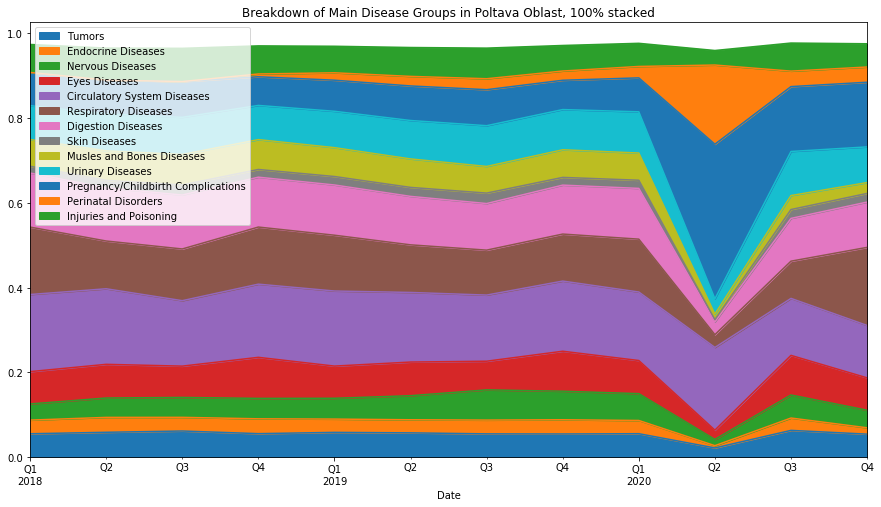

In [216]:

plot2 = PoltavaH_All_Q_L1_pivot_div_2.plot.area(figsize = (15, 8), stacked = True, title = "Breakdown of Main Disease Groups in Poltava Oblast, 100% stacked")


plt.legend(loc='upper left')
fig = plot2.get_figure()
fig.savefig("./images/Poltava_Diseases_Breakdown_Staked.png")

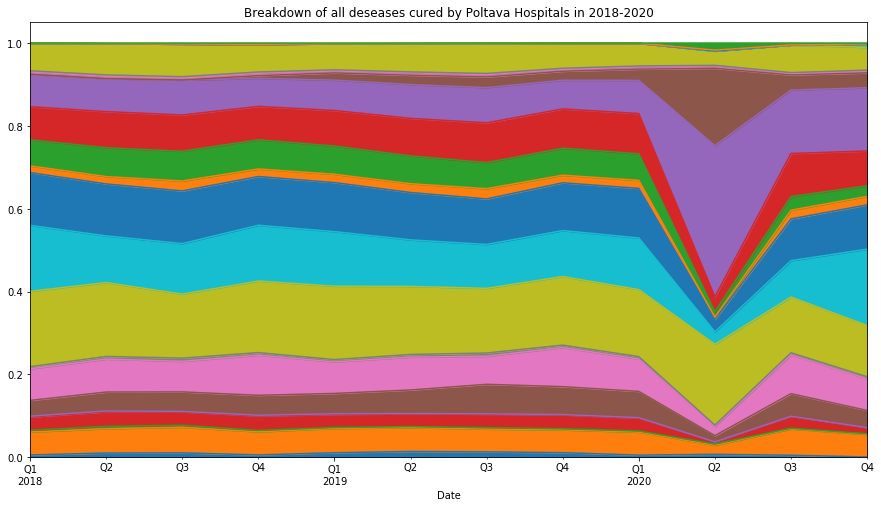

In [181]:
PoltavaH_All_Q_L1_pivot_div =  PoltavaH_All_Q_L1_pivot.divide(PoltavaH_All_Q_L1_pivot.sum(axis=1), axis=0)

PoltavaH_All_Q_L1_pivot_div.plot.area(figsize = (15, 8), stacked = True, legend = False, title = "Breakdown of all deseases cured by Poltava Hospitals in 2018-2020")

In [39]:
Poltava11_Q = PoltavaH_All_Q[PoltavaH_All_Q['Hospital_ID'] == 1111581]
Poltava11_Q_pivot = Poltava11_Q.pivot_table(index="Date", columns="Main_Diagnosis_L1", values="Record_ID")
Poltava11_Q_pivot

Main_Diagnosis_L1,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H60-H99,I00-I99,J00-J99,K00-K99,L00-L99,M00-M99,N00-N99,O00-O99,Q00-Q99,R00-R99,S00-T99,U00-U85,V00-Z99,Z00-Z99
Date,,,,,,,,,,,,,,,,,,,,
2018-03-31,4.0,34.0,3.0,6.0,4.0,87.0,NaN,637.0,300.0,287.0,38.0,323.0,141.0,1.0,4.0,16.0,194.0,NaN,2.0,1.0
2018-06-30,7.0,31.0,6.0,12.0,3.0,101.0,NaN,454.0,112.0,231.0,30.0,309.0,127.0,2.0,NaN,21.0,231.0,NaN,1.0,1.0
2018-09-30,8.0,30.0,1.0,24.0,2.0,90.0,NaN,419.0,68.0,212.0,25.0,296.0,139.0,1.0,2.0,21.0,201.0,NaN,3.0,2.0
2018-12-31,6.0,34.0,NaN,18.0,NaN,90.0,NaN,489.0,177.0,258.0,31.0,337.0,155.0,NaN,3.0,19.0,202.0,NaN,1.0,1.0
2019-03-31,4.0,42.0,3.0,5.0,NaN,94.0,NaN,550.0,173.0,252.0,38.0,273.0,153.0,1.0,2.0,11.0,218.0,NaN,4.0,1.0
2019-06-30,7.0,43.0,4.0,13.0,2.0,148.0,13.0,468.0,95.0,266.0,47.0,278.0,155.0,NaN,1.0,10.0,175.0,NaN,5.0,NaN
2019-09-30,7.0,36.0,13.0,20.0,NaN,246.0,8.0,446.0,93.0,251.0,56.0,261.0,172.0,NaN,1.0,4.0,205.0,NaN,NaN,NaN
2019-12-31,3.0,59.0,11.0,24.0,2.0,205.0,12.0,559.0,137.0,327.0,43.0,347.0,195.0,NaN,1.0,14.0,207.0,NaN,NaN,NaN
2020-03-31,5.0,39.0,6.0,8.0,3.0,167.0,5.0,298.0,164.0,235.0,42.0,276.0,151.0,1.0,NaN,6.0,156.0,NaN,NaN,NaN


In [40]:
Poltava11_Q_pivot.reset_index(inplace = True)

In [41]:
Poltava11_Q_pivot

Main_Diagnosis_L1,Date,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H60-H99,I00-I99,J00-J99,...,L00-L99,M00-M99,N00-N99,O00-O99,Q00-Q99,R00-R99,S00-T99,U00-U85,V00-Z99,Z00-Z99
0,2018-03-31,4.0,34.0,3.0,6.0,4.0,87.0,NaN,637.0,300.0,...,38.0,323.0,141.0,1.0,4.0,16.0,194.0,NaN,2.0,1.0
1,2018-06-30,7.0,31.0,6.0,12.0,3.0,101.0,NaN,454.0,112.0,...,30.0,309.0,127.0,2.0,NaN,21.0,231.0,NaN,1.0,1.0
2,2018-09-30,8.0,30.0,1.0,24.0,2.0,90.0,NaN,419.0,68.0,...,25.0,296.0,139.0,1.0,2.0,21.0,201.0,NaN,3.0,2.0
3,2018-12-31,6.0,34.0,NaN,18.0,NaN,90.0,NaN,489.0,177.0,...,31.0,337.0,155.0,NaN,3.0,19.0,202.0,NaN,1.0,1.0
4,2019-03-31,4.0,42.0,3.0,5.0,NaN,94.0,NaN,550.0,173.0,...,38.0,273.0,153.0,1.0,2.0,11.0,218.0,NaN,4.0,1.0
5,2019-06-30,7.0,43.0,4.0,13.0,2.0,148.0,13.0,468.0,95.0,...,47.0,278.0,155.0,NaN,1.0,10.0,175.0,NaN,5.0,NaN
6,2019-09-30,7.0,36.0,13.0,20.0,NaN,246.0,8.0,446.0,93.0,...,56.0,261.0,172.0,NaN,1.0,4.0,205.0,NaN,NaN,NaN
7,2019-12-31,3.0,59.0,11.0,24.0,2.0,205.0,12.0,559.0,137.0,...,43.0,347.0,195.0,NaN,1.0,14.0,207.0,NaN,NaN,NaN
8,2020-03-31,5.0,39.0,6.0,8.0,3.0,167.0,5.0,298.0,164.0,...,42.0,276.0,151.0,1.0,NaN,6.0,156.0,NaN,NaN,NaN
9,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
Poltava11_Q_pivot = Poltava11_Q_pivot.reset_index().rename_axis(None, axis=1)
Poltava11_Q_pivot

,index,Date,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H60-H99,I00-I99,...,L00-L99,M00-M99,N00-N99,O00-O99,Q00-Q99,R00-R99,S00-T99,U00-U85,V00-Z99,Z00-Z99
0,0,2018-03-31,4.0,34.0,3.0,6.0,4.0,87.0,NaN,637.0,...,38.0,323.0,141.0,1.0,4.0,16.0,194.0,NaN,2.0,1.0
1,1,2018-06-30,7.0,31.0,6.0,12.0,3.0,101.0,NaN,454.0,...,30.0,309.0,127.0,2.0,NaN,21.0,231.0,NaN,1.0,1.0
2,2,2018-09-30,8.0,30.0,1.0,24.0,2.0,90.0,NaN,419.0,...,25.0,296.0,139.0,1.0,2.0,21.0,201.0,NaN,3.0,2.0
3,3,2018-12-31,6.0,34.0,NaN,18.0,NaN,90.0,NaN,489.0,...,31.0,337.0,155.0,NaN,3.0,19.0,202.0,NaN,1.0,1.0
4,4,2019-03-31,4.0,42.0,3.0,5.0,NaN,94.0,NaN,550.0,...,38.0,273.0,153.0,1.0,2.0,11.0,218.0,NaN,4.0,1.0
5,5,2019-06-30,7.0,43.0,4.0,13.0,2.0,148.0,13.0,468.0,...,47.0,278.0,155.0,NaN,1.0,10.0,175.0,NaN,5.0,NaN
6,6,2019-09-30,7.0,36.0,13.0,20.0,NaN,246.0,8.0,446.0,...,56.0,261.0,172.0,NaN,1.0,4.0,205.0,NaN,NaN,NaN
7,7,2019-12-31,3.0,59.0,11.0,24.0,2.0,205.0,12.0,559.0,...,43.0,347.0,195.0,NaN,1.0,14.0,207.0,NaN,NaN,NaN
8,8,2020-03-31,5.0,39.0,6.0,8.0,3.0,167.0,5.0,298.0,...,42.0,276.0,151.0,1.0,NaN,6.0,156.0,NaN,NaN,NaN
9,9,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
Poltava11_Q_pivot.drop(columns=['index'], inplace = True)
Poltava11_Q_pivot.fillna(0, inplace = True)
Poltava11_Q_pivot

,Date,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H60-H99,I00-I99,J00-J99,...,L00-L99,M00-M99,N00-N99,O00-O99,Q00-Q99,R00-R99,S00-T99,U00-U85,V00-Z99,Z00-Z99
0,2018-03-31,4.0,34.0,3.0,6.0,4.0,87.0,0.0,637.0,300.0,...,38.0,323.0,141.0,1.0,4.0,16.0,194.0,0.0,2.0,1.0
1,2018-06-30,7.0,31.0,6.0,12.0,3.0,101.0,0.0,454.0,112.0,...,30.0,309.0,127.0,2.0,0.0,21.0,231.0,0.0,1.0,1.0
2,2018-09-30,8.0,30.0,1.0,24.0,2.0,90.0,0.0,419.0,68.0,...,25.0,296.0,139.0,1.0,2.0,21.0,201.0,0.0,3.0,2.0
3,2018-12-31,6.0,34.0,0.0,18.0,0.0,90.0,0.0,489.0,177.0,...,31.0,337.0,155.0,0.0,3.0,19.0,202.0,0.0,1.0,1.0
4,2019-03-31,4.0,42.0,3.0,5.0,0.0,94.0,0.0,550.0,173.0,...,38.0,273.0,153.0,1.0,2.0,11.0,218.0,0.0,4.0,1.0
5,2019-06-30,7.0,43.0,4.0,13.0,2.0,148.0,13.0,468.0,95.0,...,47.0,278.0,155.0,0.0,1.0,10.0,175.0,0.0,5.0,0.0
6,2019-09-30,7.0,36.0,13.0,20.0,0.0,246.0,8.0,446.0,93.0,...,56.0,261.0,172.0,0.0,1.0,4.0,205.0,0.0,0.0,0.0
7,2019-12-31,3.0,59.0,11.0,24.0,2.0,205.0,12.0,559.0,137.0,...,43.0,347.0,195.0,0.0,1.0,14.0,207.0,0.0,0.0,0.0
8,2020-03-31,5.0,39.0,6.0,8.0,3.0,167.0,5.0,298.0,164.0,...,42.0,276.0,151.0,1.0,0.0,6.0,156.0,0.0,0.0,0.0
9,2020-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
Poltava18_Q = PoltavaH_All_Q[PoltavaH_All_Q['Hospital_ID'] == 1999388]
Poltava18_Q_pivot = Poltava18_Q.pivot_table(index="Date", columns="Main_Diagnosis_L1", values="Record_ID")


Poltava18_Q_pivot.reset_index(inplace = True)



Poltava18_Q_pivot = Poltava18_Q_pivot.reset_index().rename_axis(None, axis=1)


Poltava18_Q_pivot.drop(columns=['index'], inplace = True)
Poltava18_Q_pivot.fillna(0, inplace = True)
Poltava18_Q_pivot

,Date,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H00-H59,H60-H99,I00-I99,...,N00-N99,O00-O99,P00-P99,Q00-Q99,R00-R99,S00-T99,U00-U85,U78-U88,V00-Z99,Z00-Z99
0,2018-03-31,62.0,247.0,23.0,88.0,21.0,88.0,218.0,30.0,626.0,...,231.0,239.0,4.0,35.0,18.0,281.0,0.0,0.0,0.0,6.0
1,2018-06-30,112.0,245.0,33.0,96.0,23.0,85.0,176.0,39.0,617.0,...,231.0,232.0,3.0,26.0,18.0,272.0,0.0,0.0,0.0,14.0
2,2018-09-30,109.0,250.0,33.0,72.0,12.0,98.0,159.0,36.0,527.0,...,227.0,260.0,2.0,29.0,19.0,307.0,0.0,0.0,0.0,13.0
3,2018-12-31,60.0,242.0,22.0,96.0,18.0,105.0,210.0,39.0,623.0,...,227.0,232.0,1.0,36.0,17.0,291.0,0.0,0.0,1.0,22.0
4,2019-03-31,125.0,259.0,11.0,76.0,22.0,93.0,169.0,35.0,573.0,...,231.0,239.0,4.0,24.0,22.0,262.0,0.0,0.0,1.0,13.0
5,2019-06-30,162.0,243.0,19.0,86.0,5.0,112.0,135.0,25.0,609.0,...,259.0,254.0,33.0,33.0,14.0,293.0,0.0,0.0,0.0,10.0
6,2019-09-30,150.0,238.0,15.0,74.0,12.0,209.0,153.0,38.0,558.0,...,249.0,255.0,40.0,29.0,30.0,266.0,0.0,0.0,0.0,14.0
7,2019-12-31,143.0,256.0,19.0,85.0,8.0,212.0,227.0,26.0,642.0,...,295.0,227.0,32.0,29.0,25.0,222.0,0.0,0.0,0.0,8.0
8,2020-03-31,38.0,81.0,5.0,26.0,7.0,59.0,63.0,14.0,191.0,...,89.0,94.0,11.0,14.0,9.0,80.0,0.0,0.0,0.0,6.0
9,2020-06-30,12.0,34.0,5.0,9.0,0.0,16.0,30.0,6.0,81.0,...,43.0,155.0,1.0,3.0,1.0,46.0,0.0,1.0,3.0,28.0


In [46]:
Poltava16_Q = PoltavaH_All_Q[PoltavaH_All_Q['Hospital_ID'] == 1999106]
Poltava16_Q_pivot = Poltava16_Q.pivot_table(index="Date", columns="Main_Diagnosis_L1", values="Record_ID")


Poltava16_Q_pivot.reset_index(inplace = True)



Poltava16_Q_pivot = Poltava16_Q_pivot.reset_index().rename_axis(None, axis=1)


Poltava16_Q_pivot.drop(columns=['index'], inplace = True)
Poltava16_Q_pivot.fillna(0, inplace = True)
Poltava16_Q_pivot

,Date,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H00-H59,H60-H99,I00-I99,...,L00-L99,M00-M99,N00-N99,O00-O99,P00-P99,Q00-Q99,R00-R99,S00-T99,V00-Z99,Z00-Z99
0,2018-03-31,8.0,465.0,29.0,340.0,1.0,340.0,810.0,40.0,1191.0,...,135.0,313.0,707.0,812.0,0.0,38.0,2.0,416.0,0.0,3.0
1,2018-06-30,5.0,448.0,28.0,325.0,1.0,377.0,803.0,41.0,1125.0,...,137.0,312.0,717.0,745.0,0.0,40.0,4.0,426.0,0.0,3.0
2,2018-09-30,10.0,465.0,23.0,293.0,2.0,379.0,731.0,57.0,916.0,...,205.0,329.0,690.0,754.0,1.0,23.0,3.0,438.0,1.0,14.0
3,2018-12-31,9.0,467.0,26.0,354.0,2.0,449.0,1085.0,44.0,1196.0,...,165.0,345.0,696.0,672.0,87.0,40.0,3.0,394.0,2.0,20.0
4,2019-03-31,9.0,448.0,17.0,320.0,0.0,441.0,802.0,39.0,1142.0,...,166.0,357.0,713.0,698.0,219.0,36.0,2.0,321.0,0.0,5.0
5,2019-06-30,4.0,432.0,11.0,287.0,1.0,450.0,857.0,42.0,976.0,...,153.0,348.0,719.0,765.0,249.0,42.0,0.0,384.0,0.0,4.0
6,2019-09-30,5.0,421.0,15.0,316.0,0.0,444.0,701.0,53.0,965.0,...,184.0,329.0,792.0,817.0,286.0,41.0,1.0,441.0,0.0,0.0
7,2019-12-31,6.0,445.0,11.0,356.0,0.0,517.0,1081.0,44.0,1094.0,...,153.0,367.0,825.0,732.0,270.0,31.0,0.0,407.0,0.0,0.0
8,2020-03-31,5.0,403.0,15.0,260.0,0.0,371.0,674.0,36.0,1035.0,...,118.0,286.0,677.0,660.0,243.0,40.0,5.0,279.0,0.0,0.0
9,2020-06-30,0.0,3.0,0.0,0.0,0.0,9.0,7.0,0.0,249.0,...,2.0,6.0,18.0,462.0,315.0,8.0,0.0,12.0,0.0,1.0


In [110]:
import pickle
with open('../mydata/desease_codes_names.pickle', 'rb') as handle:
    disease_code_names = pickle.load(handle)

In [87]:
disease16 = list(Poltava16_Q_pivot.columns.values)

In [88]:
disease16

['Date',
 'A00-B99',
 'C00-D48',
 'D50-D89',
 'E00-E99',
 'F00-F99',
 'G00-G99',
 'H00-H59',
 'H60-H99',
 'I00-I99',
 'J00-J99',
 'K00-K99',
 'L00-L99',
 'M00-M99',
 'N00-N99',
 'O00-O99',
 'P00-P99',
 'Q00-Q99',
 'R00-R99',
 'S00-T99',
 'V00-Z99',
 'Z00-Z99']

In [111]:
for d in disease16[1:]:
    print(d, disease_code_names[d])

A00-B99 ДЕЯКІ ІНФЕКЦІЙНІ ТА ПАРАЗИТАРНІ ХВОРОБИ
C00-D48 НОВОУТВОРЕННЯ
D50-D89 ХВОРОБИ КРОВІ І КРОВОТВОРНИХ ОРГАНІВ
E00-E99 ХВОРОБИ ЕНДОКРИННОЇ СИСТЕМИ
F00-F99 РОЗЛАДИ ПСИХІКИ ТА ПОВЕДІНКИ
G00-G99 ХВОРОБИ НЕРВОВОЇ СИСТЕМИ
H00-H59 ХВОРОБИ ОКА ТА ПРИДАТКОВОГО АПАРАТУ
H60-H99 ХВОРОБИ ВУХА ТА СОСКОПОДІБНОГО АПАРАТУ
I00-I99 ХВОРОБИ СИСТЕМИ КРОВООБІГУ
J00-J99 ХВОРОБИ ДИХАЛЬНОЇ СИСТЕМИ
K00-K99 ХВОРОБИ ОРГАНІВ ТРАВЛЕННЯ
L00-L99 ХВОРОБИ ШКІРИ ТА ПІДКІРНОЇ КЛІТКОВИНИ
M00-M99 ХВОРОБИ КІСТКОВО-М`ЯЗОВОЇ С-МИ І СПОЛУЧНИХ ТКАНИН
N00-N99 ХВОРОБИ СЕЧОСТАТЕВОЇ СИСТЕМИ
O00-O99 УСКЛАДНЕННЯ ВАГІТНОСТІ, ПОЛОГІВ
P00-P99 ОКРЕМІ СТАНИ, ЩО ВИНИКАЮТЬ В ПЕРИНАТ.ПЕРІОДІ
Q00-Q99 ПРИРОДНІ ВАДИ РОЗВИТКУ
R00-R99 СИМПТОМИ, ОЗНАКИ ТА ВІДХИЛЕННЯ ВІД НОРМИ, ЩО ВИЯВЛЕНІ ПРИ ЛАБОРАТОРНИХ ТА КЛІНІЧНИХ ДОСЛІДЖЕННЯХ, НЕ КЛАСИФІКОВАНІ В ІНШИХ РУБРИКАХ
S00-T99 ТРАВМИ ТА ОТРУЄННЯ
V00-Z99 ЗОВНІШНІ ПРИЧИНИ ЗАХВОРЮВАНОСТІ ТА СМЕРТНОСТІ
Z00-Z99 ЗАГАЛЬНИЙ ОГЛЯД ТА ОБСТЕЖЕННЯ ОСІБ


In [112]:
print(disease_code_names['U00-U85'])
print(disease_code_names['U78-U88'])

Коди для особливих цілей
Додаткові коди для хронічних станів


In [47]:
with pd.ExcelWriter('Poltava_3_Hospitals_2.xlsx') as writer:  
    Poltava11_Q_pivot.to_excel(writer, sheet_name='1111581')
    Poltava18_Q_pivot.to_excel(writer, sheet_name='1999388')
    Poltava16_Q_pivot.to_excel(writer, sheet_name='1999106')

In [50]:
PHospitals3_days_20 = PHospitals3_days[PHospitals3_days['Date'] >='2020-01-01']

In [51]:
PoltavaU_All_Q = PHospitals3_days_20.groupby([pd.Grouper(key = 'Date', freq='M'), 'Hospital_ID','Urgency'])['Record_ID'].nunique()
PoltavaU_All_Q

Date        Hospital_ID  Urgency 
2020-03-31  1999106      Планове       38
                         Ургентне      53
            1999388      Планове        1
                         Ургентне       7
2020-04-30  1999106      Планове      186
                         Ургентне     269
            1999388      Планове       40
                         Ургентне      27
2020-05-31  1999106      Планове      102
                         Ургентне     254
            1999388      Планове      111
                         Ургентне      45
2020-06-30  1999106      Планове      170
                         Ургентне     294
            1999388      Планове      277
                         Ургентне     145
2020-07-31  1111581      Ургентне       1
            1999106      Планове     1232
                         Ургентне     888
            1999388      Планове      354
                         Ургентне     181
2020-08-31  1999106      Планове     1163
                         Ургентне     992


In [52]:
PoltavaU_All_Q = PoltavaU_All_Q.reset_index()
PoltavaU_All_Q

,Date,Hospital_ID,Urgency,Record_ID
0,2020-03-31,1999106,Планове,38
1,2020-03-31,1999106,Ургентне,53
2,2020-03-31,1999388,Планове,1
3,2020-03-31,1999388,Ургентне,7
4,2020-04-30,1999106,Планове,186
5,2020-04-30,1999106,Ургентне,269
6,2020-04-30,1999388,Планове,40
7,2020-04-30,1999388,Ургентне,27
8,2020-05-31,1999106,Планове,102
9,2020-05-31,1999106,Ургентне,254


In [54]:
PoltavaU_11_M = PoltavaU_All_Q[PoltavaU_All_Q['Hospital_ID'] == 1111581]
PoltavaU_11_M


,Date,Hospital_ID,Urgency,Record_ID
16,2020-07-31,1111581,Ургентне,1
33,2020-11-30,1111581,Планове,2
34,2020-11-30,1111581,Ургентне,100
39,2020-12-31,1111581,Планове,4
40,2020-12-31,1111581,Ургентне,370


In [56]:
PoltavaU_11_M_pivot = PoltavaU_11_M.pivot_table(index="Date", columns="Urgency", values="Record_ID")
PoltavaU_11_M_pivot

Urgency,Планове,Ургентне
Date,,
2020-07-31,NaN,1.0
2020-11-30,2.0,100.0
2020-12-31,4.0,370.0


In [57]:
PoltavaU_11_M_pivot.reset_index(inplace = True)

PoltavaU_11_M_pivot.fillna(0, inplace = True)
PoltavaU_11_M_pivot

Urgency,Date,Планове,Ургентне
0,2020-07-31,0.0,1.0
1,2020-11-30,2.0,100.0
2,2020-12-31,4.0,370.0


In [58]:

PoltavaU_11_M_pivot = PoltavaU_11_M_pivot.reset_index().rename_axis(None, axis=1)
PoltavaU_11_M_pivot


,index,Date,Планове,Ургентне
0,0,2020-07-31,0.0,1.0
1,1,2020-11-30,2.0,100.0
2,2,2020-12-31,4.0,370.0


In [144]:
PoltavaU_11_M_pivot

,Планове,Ургентне
Date,,
2020-07-31,0.0,1.0
2020-11-30,2.0,100.0
2020-12-31,4.0,370.0


In [145]:
PoltavaU_11_M_pivot.columns = ['Planned', 'Urgent']

[Text(0, 0, '2020-07'), Text(0, 0, '2020-11'), Text(0, 0, '2020-12')]

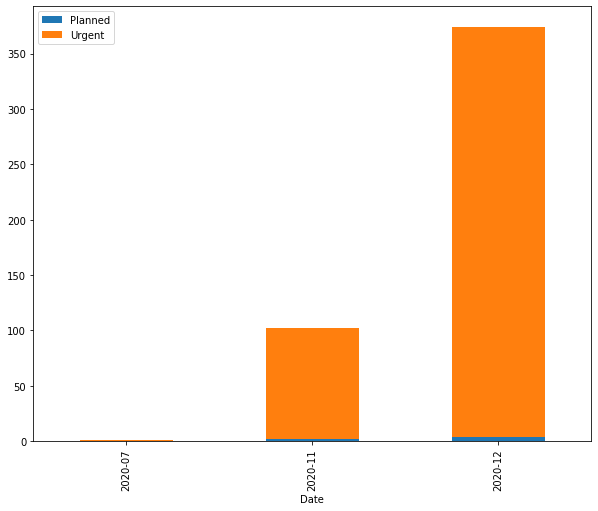

In [147]:

#PoltavaU_11_M_pivot.drop(columns=['index'], inplace = True) 

import matplotlib.pyplot as plt
#PoltavaU_11_M_pivot = PoltavaU_11_M_pivot.set_index('Date')
fig, ax = plt.subplots(figsize=(10,8))
PoltavaU_11_M_pivot.plot(ax = ax, kind='bar',stacked=True)
ax.xaxis.set_ticklabels(PoltavaU_11_M_pivot.index.to_period('M'))

In [55]:
PoltavaU_18_M = PoltavaU_All_Q[PoltavaU_All_Q['Hospital_ID'] == 1999388]
PoltavaU_18_M

,Date,Hospital_ID,Urgency,Record_ID
2,2020-03-31,1999388,Планове,1
3,2020-03-31,1999388,Ургентне,7
6,2020-04-30,1999388,Планове,40
7,2020-04-30,1999388,Ургентне,27
10,2020-05-31,1999388,Планове,111
11,2020-05-31,1999388,Ургентне,45
14,2020-06-30,1999388,Планове,277
15,2020-06-30,1999388,Ургентне,145
19,2020-07-31,1999388,Планове,354
20,2020-07-31,1999388,Ургентне,181


In [67]:
PoltavaU_18_M_pivot = PoltavaU_18_M.pivot_table(index="Date", columns="Urgency", values="Record_ID")
PoltavaU_18_M_pivot

PoltavaU_18_M_pivot.reset_index(inplace = True)

PoltavaU_18_M_pivot.fillna(0, inplace = True)



PoltavaU_18_M_pivot = PoltavaU_18_M_pivot.reset_index().rename_axis(None, axis=1)




PoltavaU_18_M_pivot.drop(columns=['index'], inplace = True) 


PoltavaU_18_M_pivot = PoltavaU_18_M_pivot.set_index('Date')


In [148]:
PoltavaU_18_M_pivot.columns = ['Planned', 'Urgent']

[Text(0, 0, '2020-03'),
 Text(0, 0, '2020-04'),
 Text(0, 0, '2020-05'),
 Text(0, 0, '2020-06'),
 Text(0, 0, '2020-07'),
 Text(0, 0, '2020-08'),
 Text(0, 0, '2020-09'),
 Text(0, 0, '2020-10'),
 Text(0, 0, '2020-11'),
 Text(0, 0, '2020-12')]

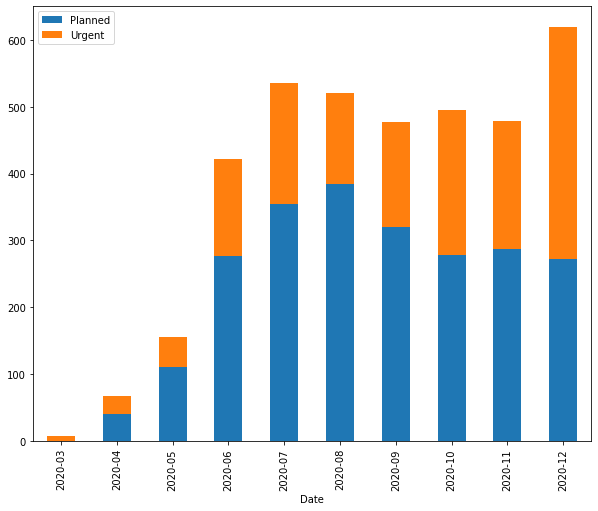

In [149]:
fig, ax = plt.subplots(figsize=(10,8))
PoltavaU_18_M_pivot.plot(ax = ax, kind='bar',stacked=True)
ax.xaxis.set_ticklabels(PoltavaU_18_M_pivot.index.to_period('m'))

In [69]:
PoltavaU_16_M = PoltavaU_All_Q[PoltavaU_All_Q['Hospital_ID'] == 1999106]
PoltavaU_16_M

,Date,Hospital_ID,Urgency,Record_ID
0,2020-03-31,1999106,Планове,38
1,2020-03-31,1999106,Ургентне,53
4,2020-04-30,1999106,Планове,186
5,2020-04-30,1999106,Ургентне,269
8,2020-05-31,1999106,Планове,102
9,2020-05-31,1999106,Ургентне,254
12,2020-06-30,1999106,Планове,170
13,2020-06-30,1999106,Ургентне,294
17,2020-07-31,1999106,Планове,1232
18,2020-07-31,1999106,Ургентне,888


In [70]:
PoltavaU_16_M_pivot = PoltavaU_16_M.pivot_table(index="Date", columns="Urgency", values="Record_ID")
PoltavaU_16_M_pivot

PoltavaU_16_M_pivot.reset_index(inplace = True)

PoltavaU_16_M_pivot.fillna(0, inplace = True)



PoltavaU_16_M_pivot = PoltavaU_16_M_pivot.reset_index().rename_axis(None, axis=1)




PoltavaU_16_M_pivot.drop(columns=['index'], inplace = True) 


PoltavaU_16_M_pivot = PoltavaU_16_M_pivot.set_index('Date')


In [150]:
PoltavaU_16_M_pivot.columns = ['Planned', 'Urgent']

[Text(0, 0, '2020-03'),
 Text(0, 0, '2020-04'),
 Text(0, 0, '2020-05'),
 Text(0, 0, '2020-06'),
 Text(0, 0, '2020-07'),
 Text(0, 0, '2020-08'),
 Text(0, 0, '2020-09'),
 Text(0, 0, '2020-10'),
 Text(0, 0, '2020-11'),
 Text(0, 0, '2020-12')]

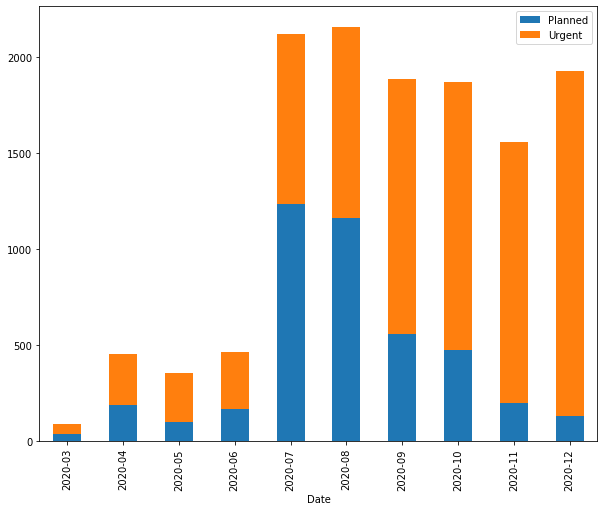

In [152]:
fig, ax = plt.subplots(figsize=(10,8))
PoltavaU_16_M_pivot.plot(ax = ax, kind='bar',stacked=True)
ax.xaxis.set_ticklabels(PoltavaU_16_M_pivot.index.to_period('M'))

In [73]:
pdays20_4 = pd.read_pickle("../mydata/Poltava2020_4_days_all_diagnosis.pkl")

In [75]:
P3H = pdays20_4[pdays20_4['Hospital_ID'] == 1111581]

In [76]:
P3H 

,Date,Record_ID,index,Hospital_ID,Reporting_Month,Data_Source,Type_of_Referral,Finance_Program,Referral_ID,Position_of_Doctor_Who_Gave_Referral,...,Discharge_Month,Discharge_Day,Discharge_Year,Hospitalization_Day,Main_Diagnosis_L1,Main_Diagnosis_L1_name,Main_Diagnosis_L2,Main_Diagnosis_L2_name,Main_Diagnosis_L3,Main_Diagnosis_L3_name
850,2020-12-06,0092c8b2-9473-438c-8f6f-8ce1ee3d6b78,167274,1111581,грудень,EHEALTH,Паперове направлення,NaN,NaN,NaN,...,12,9,2020,5,J00-J99,ХВОРОБИ ДИХАЛЬНОЇ СИСТЕМИ,J10-J18,Грип та пневмонія,J12,"Вірусна пневмонія, не класифікована в інших ру..."
851,2020-12-07,0092c8b2-9473-438c-8f6f-8ce1ee3d6b78,167274,1111581,грудень,EHEALTH,Паперове направлення,NaN,NaN,NaN,...,12,9,2020,5,J00-J99,ХВОРОБИ ДИХАЛЬНОЇ СИСТЕМИ,J10-J18,Грип та пневмонія,J12,"Вірусна пневмонія, не класифікована в інших ру..."
852,2020-12-08,0092c8b2-9473-438c-8f6f-8ce1ee3d6b78,167274,1111581,грудень,EHEALTH,Паперове направлення,NaN,NaN,NaN,...,12,9,2020,5,J00-J99,ХВОРОБИ ДИХАЛЬНОЇ СИСТЕМИ,J10-J18,Грип та пневмонія,J12,"Вірусна пневмонія, не класифікована в інших ру..."
853,2020-12-09,0092c8b2-9473-438c-8f6f-8ce1ee3d6b78,167274,1111581,грудень,EHEALTH,Паперове направлення,NaN,NaN,NaN,...,12,9,2020,5,J00-J99,ХВОРОБИ ДИХАЛЬНОЇ СИСТЕМИ,J10-J18,Грип та пневмонія,J12,"Вірусна пневмонія, не класифікована в інших ру..."
1251,2020-11-22,00c479db-085a-4349-9a08-a39305b01ffe,286210,1111581,грудень,EHEALTH,Без направлення,NaN,NaN,NaN,...,12,3,2020,21,J00-J99,ХВОРОБИ ДИХАЛЬНОЇ СИСТЕМИ,J10-J18,Грип та пневмонія,J12,"Вірусна пневмонія, не класифікована в інших ру..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412247,2020-12-24,febc4242-9f4c-4dc8-b625-0af5e022fe56,600082,1111581,січень,EHEALTH,Паперове направлення,NaN,NaN,NaN,...,12,28,2020,18,J00-J99,ХВОРОБИ ДИХАЛЬНОЇ СИСТЕМИ,J10-J18,Грип та пневмонія,J12,"Вірусна пневмонія, не класифікована в інших ру..."
412248,2020-12-25,febc4242-9f4c-4dc8-b625-0af5e022fe56,600082,1111581,січень,EHEALTH,Паперове направлення,NaN,NaN,NaN,...,12,28,2020,18,J00-J99,ХВОРОБИ ДИХАЛЬНОЇ СИСТЕМИ,J10-J18,Грип та пневмонія,J12,"Вірусна пневмонія, не класифікована в інших ру..."
412249,2020-12-26,febc4242-9f4c-4dc8-b625-0af5e022fe56,600082,1111581,січень,EHEALTH,Паперове направлення,NaN,NaN,NaN,...,12,28,2020,18,J00-J99,ХВОРОБИ ДИХАЛЬНОЇ СИСТЕМИ,J10-J18,Грип та пневмонія,J12,"Вірусна пневмонія, не класифікована в інших ру..."
412250,2020-12-27,febc4242-9f4c-4dc8-b625-0af5e022fe56,600082,1111581,січень,EHEALTH,Паперове направлення,NaN,NaN,NaN,...,12,28,2020,18,J00-J99,ХВОРОБИ ДИХАЛЬНОЇ СИСТЕМИ,J10-J18,Грип та пневмонія,J12,"Вірусна пневмонія, не класифікована в інших ру..."


In [79]:
P3H = P3H.sort_values(by='Date', ascending=True, na_position='first')

In [80]:
P3H

,Date,Record_ID,index,Hospital_ID,Reporting_Month,Data_Source,Type_of_Referral,Finance_Program,Referral_ID,Position_of_Doctor_Who_Gave_Referral,...,Discharge_Month,Discharge_Day,Discharge_Year,Hospitalization_Day,Main_Diagnosis_L1,Main_Diagnosis_L1_name,Main_Diagnosis_L2,Main_Diagnosis_L2_name,Main_Diagnosis_L3,Main_Diagnosis_L3_name
402378,2020-07-10,f847ac4d-8d0d-45fe-9c25-61aa94fc442b,211630,1111581,липень,EHEALTH,Без направлення,NaN,NaN,NaN,...,7,21,2020,10,M00-M99,ХВОРОБИ КІСТКОВО-М`ЯЗОВОЇ С-МИ І СПОЛУЧНИХ ТКАНИН,M80-M94,Остеопатії та хондропатії,M84,Порушення цілісності кістки
402379,2020-07-11,f847ac4d-8d0d-45fe-9c25-61aa94fc442b,211630,1111581,липень,EHEALTH,Без направлення,NaN,NaN,NaN,...,7,21,2020,10,M00-M99,ХВОРОБИ КІСТКОВО-М`ЯЗОВОЇ С-МИ І СПОЛУЧНИХ ТКАНИН,M80-M94,Остеопатії та хондропатії,M84,Порушення цілісності кістки
402380,2020-07-12,f847ac4d-8d0d-45fe-9c25-61aa94fc442b,211630,1111581,липень,EHEALTH,Без направлення,NaN,NaN,NaN,...,7,21,2020,10,M00-M99,ХВОРОБИ КІСТКОВО-М`ЯЗОВОЇ С-МИ І СПОЛУЧНИХ ТКАНИН,M80-M94,Остеопатії та хондропатії,M84,Порушення цілісності кістки
402381,2020-07-13,f847ac4d-8d0d-45fe-9c25-61aa94fc442b,211630,1111581,липень,EHEALTH,Без направлення,NaN,NaN,NaN,...,7,21,2020,10,M00-M99,ХВОРОБИ КІСТКОВО-М`ЯЗОВОЇ С-МИ І СПОЛУЧНИХ ТКАНИН,M80-M94,Остеопатії та хондропатії,M84,Порушення цілісності кістки
402382,2020-07-14,f847ac4d-8d0d-45fe-9c25-61aa94fc442b,211630,1111581,липень,EHEALTH,Без направлення,NaN,NaN,NaN,...,7,21,2020,10,M00-M99,ХВОРОБИ КІСТКОВО-М`ЯЗОВОЇ С-МИ І СПОЛУЧНИХ ТКАНИН,M80-M94,Остеопатії та хондропатії,M84,Порушення цілісності кістки
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25309,2021-01-12,0f91621c-1a5a-4ffb-a8d7-251dafad61bd,678406,1111581,січень,EHEALTH,Без направлення,NaN,NaN,NaN,...,1,12,2021,10,J00-J99,ХВОРОБИ ДИХАЛЬНОЇ СИСТЕМИ,J10-J18,Грип та пневмонія,J12,"Вірусна пневмонія, не класифікована в інших ру..."
20711,2021-01-13,0cb4e65d-3f31-484c-a550-b23d03200f9f,767672,1111581,січень,EHEALTH,Паперове направлення,NaN,NaN,NaN,...,1,13,2021,9,J00-J99,ХВОРОБИ ДИХАЛЬНОЇ СИСТЕМИ,J90-J94,Інші хвороби плеври,J94,Iнші ураження плеври
383673,2021-01-13,ecb10854-2f9f-4d65-81c7-122fe4f73b49,673717,1111581,січень,EHEALTH,Без направлення,NaN,NaN,NaN,...,1,13,2021,9,U00-U85,Коди для особливих цілей,U00-U49,Тимчасовий код для нових діагнозів неясної ети...,U07,Використовувати в надзвичайній ситуації
352623,2021-01-13,d9ca4297-b90e-41cd-9fde-479028eaa8d1,736558,1111581,січень,EHEALTH,Паперове направлення,NaN,NaN,NaN,...,1,13,2021,10,I00-I99,ХВОРОБИ СИСТЕМИ КРОВООБІГУ,I30-I52,Інші хвороби серця,I48,Фібриляція та тріпотіння передсердь


In [113]:
PoltavaH_All_Q_L2 = PHospitals3_days.groupby([pd.Grouper(key = 'Date', freq='Q'), 'Hospital_ID','Main_Diagnosis_L1', 'Main_Diagnosis_L2'])['Record_ID'].nunique()
PoltavaH_All_Q_L2

Date        Hospital_ID  Main_Diagnosis_L1  Main_Diagnosis_L2
2018-03-31  1111581      A00-B99            A30-A49               3
                                            A50-A64               1
                         C00-D48            C00-C75              23
                                            D10-D36              10
                                            D37-D48               1
                                                                 ..
2020-12-31  1999388      S00-T99            T90-T98               4
                         U00-U85            U00-U49              16
                         V00-Z99            T90-T98               2
                         Z00-Z99            Z00-Z19               2
                                            Z30-Z39               4
Name: Record_ID, Length: 3714, dtype: int64

In [114]:
PoltavaH_All_Q_L2 = PoltavaH_All_Q_L2.reset_index()

In [115]:
PoltavaH_All_Q_L2

,Date,Hospital_ID,Main_Diagnosis_L1,Main_Diagnosis_L2,Record_ID
0,2018-03-31,1111581,A00-B99,A30-A49,3
1,2018-03-31,1111581,A00-B99,A50-A64,1
2,2018-03-31,1111581,C00-D48,C00-C75,23
3,2018-03-31,1111581,C00-D48,D10-D36,10
4,2018-03-31,1111581,C00-D48,D37-D48,1
...,...,...,...,...,...
3709,2020-12-31,1999388,S00-T99,T90-T98,4
3710,2020-12-31,1999388,U00-U85,U00-U49,16
3711,2020-12-31,1999388,V00-Z99,T90-T98,2
3712,2020-12-31,1999388,Z00-Z99,Z00-Z19,2


In [116]:
P16_L2_Q = PoltavaH_All_Q_L2[PoltavaH_All_Q_L2['Hospital_ID'] == 1999106]

In [117]:
P16_L2_Q_pivot = P16_L2_Q.pivot_table(index="Date", columns="Main_Diagnosis_L2", values="Record_ID")


P16_L2_Q_pivot.reset_index(inplace = True)



P16_L2_Q_pivot = P16_L2_Q_pivot.reset_index().rename_axis(None, axis=1)


P16_L2_Q_pivot.drop(columns=['index'], inplace = True)
P16_L2_Q_pivot.fillna(0, inplace = True)
P16_L2_Q_pivot

,Date,A00-A09,A15-A19,A30-A49,A50-A64,A80-A89,A90-A99,B00-B09,B15-B19,B20-B24,...,T36-T50,T51-T65,T66-T78,T79-T79,T80-T88,T90-T98,Z00-Z19,Z30-Z39,Z40-Z54,Z80-Z99
0,2018-03-31,0.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,8.0,0.0,10.0,48.0,0.0,0.0,0.0,3.0
1,2018-06-30,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,1.0,9.0,44.0,1.0,1.0,0.0,1.0
2,2018-09-30,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,3.0,6.0,0.0,7.0,18.5,0.0,5.0,0.0,9.0
3,2018-12-31,1.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,2.0,2.0,3.0,16.5,3.0,3.0,1.0,13.0
4,2019-03-31,1.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,6.0,0.0,8.0,34.0,0.0,0.0,0.0,5.0
5,2019-06-30,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,23.0,0.0,7.0,19.0,1.0,1.0,0.0,2.0
6,2019-09-30,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,15.0,0.0,12.0,16.0,0.0,0.0,0.0,0.0
7,2019-12-31,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,14.0,0.0,14.0,16.0,0.0,0.0,0.0,0.0
8,2020-03-31,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,10.0,0.0,9.0,20.0,0.0,0.0,0.0,0.0
9,2020-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [118]:
P16_L2_Q_pivotT = P16_L2_Q_pivot.T

In [109]:
with pd.ExcelWriter('Poltava_3_Hospitals_2.xlsx', engine="openpyxl", mode='a') as writer:  
    P16_L2_Q_pivotT.to_excel(writer, sheet_name='1999106_L22')

In [120]:
P16_L2_Q_pivotT = P16_L2_Q_pivotT.reset_index()
P16_L2_Q_pivotT

,index,0,1,2,3,4,5,6,7,8,9,10,11
0,Date,2018-03-31 00:00:00,2018-06-30 00:00:00,2018-09-30 00:00:00,2018-12-31 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,2019-09-30 00:00:00,2019-12-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00
1,A00-A09,0,0,0,1,1,1,0,0,0,0,0,0
2,A15-A19,4,1,1,3,1,1,1,2,2,0,1,0
3,A30-A49,1,0,1,1,1,0,2,1,0,0,0,1
4,A50-A64,1,2,1,1,3,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,T90-T98,48,44,18.5,16.5,34,19,16,16,20,0,8,10
166,Z00-Z19,0,1,0,3,0,1,0,0,0,0,0,0
167,Z30-Z39,0,1,5,3,0,1,0,0,0,0,0,7
168,Z40-Z54,0,0,0,1,0,0,0,0,0,1,3,0


In [121]:
P16_L2_Q_pivotT.drop([0], inplace = True)

In [122]:
P16_L2_Q_pivotT

,index,0,1,2,3,4,5,6,7,8,9,10,11
1,A00-A09,0,0,0,1,1,1,0,0,0,0,0,0
2,A15-A19,4,1,1,3,1,1,1,2,2,0,1,0
3,A30-A49,1,0,1,1,1,0,2,1,0,0,0,1
4,A50-A64,1,2,1,1,3,1,1,0,0,0,1,0
5,A80-A89,0,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,T90-T98,48,44,18.5,16.5,34,19,16,16,20,0,8,10
166,Z00-Z19,0,1,0,3,0,1,0,0,0,0,0,0
167,Z30-Z39,0,1,5,3,0,1,0,0,0,0,0,7
168,Z40-Z54,0,0,0,1,0,0,0,0,0,1,3,0


In [123]:
P16_L2_Q_pivotT['Main_Diagnosis_Name'] = P16_L2_Q_pivotT['index'].apply(lambda x: disease_code_names[x])

In [124]:
P16_L2_Q_pivotT

,index,0,1,2,3,4,5,6,7,8,9,10,11,Main_Diagnosis_Name
1,A00-A09,0,0,0,1,1,1,0,0,0,0,0,0,Кишкові інфекційні хвороби
2,A15-A19,4,1,1,3,1,1,1,2,2,0,1,0,Туберкульоз
3,A30-A49,1,0,1,1,1,0,2,1,0,0,0,1,Інші бактеріальні хвороби
4,A50-A64,1,2,1,1,3,1,1,0,0,0,1,0,"Інфекційні хвороби, що передаються переважно с..."
5,A80-A89,0,0,0,0,1,1,0,0,1,0,0,0,Вірусні інфекційні хвороби центральної нервово...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,T90-T98,48,44,18.5,16.5,34,19,16,16,20,0,8,10,"Віддалені наслідки травм, отруєння та дій інши..."
166,Z00-Z19,0,1,0,3,0,1,0,0,0,0,0,0,Звертання до закладів охорони здоров'я для огл...
167,Z30-Z39,0,1,5,3,0,1,0,0,0,0,0,7,Звертання до закладів охорони здоров'я у зв'яз...
168,Z40-Z54,0,0,0,1,0,0,0,0,0,1,3,0,Звертання до закладів охорони здоров'я за нада...


In [125]:
with pd.ExcelWriter('Poltava_3_Hospitals_2.xlsx', engine="openpyxl", mode='a') as writer:  
    P16_L2_Q_pivotT.to_excel(writer, sheet_name='1999106_L23')

In [126]:

P16_days = PHospitals3_days[PHospitals3_days['Hospital_ID'] == 1999106]
P16_days_heart = P16_days[P16_days ['Main_Diagnosis_L1'] == 'I00-I99']
P16_days_heart
#P16_L3_Heart_Q

,Record_ID,Hospitalization_Visit_Date_x,Discharge_Date_x,Date,Hospital,Hospital_ID,System_Input_Date,ID,Patient_Gender,Birth_Date,...,Package_Id,Procedure_ID.1,Service_Name,Compliance_Comment,ADSG,UDSG,Reason_of_Visit,Result_of_Care,Errors_in_Grouping,Patient_ID
356,{985DA55C-624F-4A97-9F10-10082A22A1A9},2017-12-19 00:00:00,2018-01-03 00:00:00,2018-01-01,"КП ""ПОЛТАВСЬКА ОБЛАСНА КЛІНІЧНА ЛІКАРНЯ ІМ. М....",1999106,2017-12-19 00:00:00,26427,2,1947-01-03 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,{985DA55C-624F-4A97-9F10-10082A22A1A9},2017-12-19 00:00:00,2018-01-03 00:00:00,2018-01-02,"КП ""ПОЛТАВСЬКА ОБЛАСНА КЛІНІЧНА ЛІКАРНЯ ІМ. М....",1999106,2017-12-19 00:00:00,26427,2,1947-01-03 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,{985DA55C-624F-4A97-9F10-10082A22A1A9},2017-12-19 00:00:00,2018-01-03 00:00:00,2018-01-03,"КП ""ПОЛТАВСЬКА ОБЛАСНА КЛІНІЧНА ЛІКАРНЯ ІМ. М....",1999106,2017-12-19 00:00:00,26427,2,1947-01-03 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,{CC4E5785-2C72-404E-A612-6F07C1C11F4C},2017-12-28 00:00:00,2018-01-02 00:00:00,2018-01-01,"КП ""ПОЛТАВСЬКА ОБЛАСНА КЛІНІЧНА ЛІКАРНЯ ІМ. М....",1999106,2017-12-28 00:00:00,27015,1,1941-06-10 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,{CC4E5785-2C72-404E-A612-6F07C1C11F4C},2017-12-28 00:00:00,2018-01-02 00:00:00,2018-01-02,"КП ""ПОЛТАВСЬКА ОБЛАСНА КЛІНІЧНА ЛІКАРНЯ ІМ. М....",1999106,2017-12-28 00:00:00,27015,1,1941-06-10 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080366,6760e99f-9c68-2c68-bb19-4084f1e27584,2020-12-29 02:00:00,2020-12-31 16:30:00,2020-12-31,NaN,1999106,2021-01-03 11:09:37.446,NaN,Жіноча,NaN,...,3.0,8.3.10,Операції на венах,NaN,F20,8.3.10,За направленням паперовим,Виписаний з одужанням,-,3B2C3004993FD1131BE0EE11ABD836D172FDE6FFFFD842...
1080390,89712a7b-cd6f-15a2-a54f-b3f725968db8,2020-12-29 02:00:00,2020-12-30 12:00:00,2020-12-30,NaN,1999106,2020-12-30 13:37:34.004,NaN,Жіноча,NaN,...,3.0,7.0.08,Інші операції на серці,NaN,F42,7.0.08,За направленням паперовим,Виписаний з одужанням,-,5B04B5F29AD0FD5E596EAF84462706EC649CC5827D46B3...
1080473,6e91a9bf-dd68-34e9-a63b-1ae4abe5652e,2020-12-30 02:00:00,2021-01-05 16:00:00,2020-12-31,NaN,1999106,2021-01-06 09:24:26.921,NaN,Чоловіча,NaN,...,NaN,NaN,NaN,Немає договору на пакет 6\nНемає договору на п...,F60,I05,За направленням паперовим,Виписаний з одужанням,-,1AB72E1D0FEA42F526CB177B2D79B1CF95FBBAA3838363...
1080731,b6841dfe-5a17-1070-8740-2787d927ed06,2020-12-30 02:00:00,2020-12-31 11:54:00,2020-12-31,NaN,1999106,2021-01-04 14:22:07.919,NaN,Чоловіча,NaN,...,3.0,7.0.08,Інші операції на серці,NaN,F42,7.0.08,Самозвернення,Виписаний з одужанням,-,051FDD36265574DF1D0CC1A352428E8F4A5B6D9D7C543C...


In [143]:
P16_L3_Heart_Q = P16_days_heart.groupby([pd.Grouper(key = 'Date', freq='Q'),'Main_Diagnosis_L3'])['Record_ID'].nunique()
P16_L3_Heart_Q 

Date        Main_Diagnosis_L3
2018-03-31  I02                   1
            I05                   2
            I06                   2
            I07                   1
            I08                   8
                                 ..
2020-12-31  I82                   2
            I83                  10
            I85                   3
            I86                   2
            I88                   1
Name: Record_ID, Length: 474, dtype: int64

In [140]:
P16_L3_Heart_Q = P16_L3_Heart_Q.reset_index()

In [141]:
P16_L3_Heart_Q

,index,Date,Main_Diagnosis_L3,Record_ID
0,0,2018-03-31,I02,1
1,1,2018-03-31,I05,2
2,2,2018-03-31,I06,2
3,3,2018-03-31,I07,1
4,4,2018-03-31,I08,8
...,...,...,...,...
469,469,2020-12-31,I82,2
470,470,2020-12-31,I83,10
471,471,2020-12-31,I85,3
472,472,2020-12-31,I86,2


In [130]:
P16_L3_Heart_Q_pivot = P16_L3_Heart_Q.pivot_table(index="Date", columns="Main_Diagnosis_L3", values="Record_ID")


P16_L3_Heart_Q_pivot.reset_index(inplace = True)



P16_L3_Heart_Q_pivot = P16_L3_Heart_Q_pivot.reset_index().rename_axis(None, axis=1)


P16_L3_Heart_Q_pivot.drop(columns=['index'], inplace = True)
P16_L3_Heart_Q_pivot.fillna(0, inplace = True)
P16_L3_Heart_Q_pivot

,Date,I00,I01,I02,I05,I06,I07,I08,I09,I10,...,I80,I82,I83,I84,I85,I86,I87,I88,I89,I97
0,2018-03-31,0.0,0.0,1.0,2.0,2.0,1.0,8.0,0.0,20.0,...,17.0,2.0,135.0,48.0,1.0,3.0,1.0,0.0,0.0,1.0
1,2018-06-30,0.0,1.0,0.0,4.0,1.0,0.0,8.0,1.0,4.0,...,13.0,0.0,87.0,42.0,1.0,4.0,6.0,0.0,0.0,0.0
2,2018-09-30,0.0,1.0,0.0,5.0,2.0,0.0,7.0,1.0,3.0,...,11.0,0.0,47.0,47.0,3.0,2.0,5.0,0.0,0.0,0.0
3,2018-12-31,1.0,0.0,0.0,5.0,1.0,0.0,9.0,5.0,11.0,...,19.0,2.0,119.0,55.0,1.0,2.0,7.0,1.0,0.0,0.0
4,2019-03-31,2.0,0.0,0.0,3.0,4.0,0.0,8.0,0.0,3.0,...,8.0,0.0,144.0,58.0,0.0,13.0,2.0,0.0,0.0,0.0
5,2019-06-30,0.0,0.0,0.0,4.0,1.0,0.0,10.0,0.0,2.0,...,9.0,0.0,82.0,45.0,1.0,7.0,4.0,0.0,1.0,0.0
6,2019-09-30,0.0,0.0,0.0,3.0,0.0,0.0,7.0,0.0,1.0,...,10.0,0.0,69.0,45.0,0.0,2.0,9.0,1.0,0.0,0.0
7,2019-12-31,0.0,0.0,0.0,2.0,0.0,0.0,12.0,0.0,4.0,...,13.0,2.0,109.0,53.0,0.0,5.0,5.0,4.0,3.0,0.0
8,2020-03-31,0.0,1.0,0.0,1.0,0.0,1.0,4.0,0.0,0.0,...,9.0,3.0,123.0,53.0,0.0,5.0,2.0,2.0,1.0,0.0
9,2020-06-30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [131]:
P16_L3_Heart_Q_pivotT = P16_L3_Heart_Q_pivot.T

In [135]:
P16_L3_Heart_Q_pivotT = P16_L3_Heart_Q_pivotT.reset_index()

In [136]:
P16_L3_Heart_Q_pivotT.drop([0], inplace = True)

In [137]:
P16_L3_Heart_Q_pivotT['Main_Diagnosis_Name'] = P16_L3_Heart_Q_pivotT['index'].apply(lambda x: disease_code_names[x])

In [138]:
P16_L3_Heart_Q_pivotT

,index,0,1,2,3,4,5,6,7,8,9,10,11,Main_Diagnosis_Name
1,I00,0,0,0,1,2,0,0,0,0,0,0,0,Ревматична гарячка без залучення серця
2,I01,0,1,1,0,0,0,0,0,1,0,0,0,Ревматична гарячка з залученням серця
3,I02,1,0,0,0,0,0,0,0,0,0,0,0,Ревматична хорея
4,I05,2,4,5,5,3,4,3,2,1,1,0,2,Ревматичні хвороби мітрального клапану
5,I06,2,1,2,1,4,1,0,0,0,0,0,1,Ревматичні хвороби аортального клапану
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,I86,3,4,2,2,13,7,2,5,5,0,3,2,Варикозне розширення вен інших локалізацій
65,I87,1,6,5,7,2,4,9,5,2,0,4,0,Iнші ураження вен
66,I88,0,0,0,1,0,0,1,4,2,1,2,1,Неспецифічний лімфаденіт
67,I89,0,0,0,0,0,1,0,3,1,0,0,0,Iнші неінфекційні хвороби лімфатичних судин та...


In [139]:
with pd.ExcelWriter('Poltava_3_Hospitals_2.xlsx', engine="openpyxl", mode='a') as writer:  
    P16_L3_Heart_Q_pivotT.to_excel(writer, sheet_name='1999106_L24')